# CAT plot focus Challenge

The purpose of this challenge is for you to familiarize yourself with emulator selection by creating a Computational Accuracy vs. Time (CAT) plot for many different emulator options (Including Gaussian Processes, RBMS, Neural Networks). 

The problem of choice is to find the ground state of the anharmonic oscillator as a function of $\kappa_1\in[0.5,4]$ and $\kappa_2\in[0,2]$.

\begin{equation}
    H \phi(x) = \lambda \phi(x),
\end{equation}

with

\begin{equation}
    H = -\frac{\partial^2}{\partial x^2} + \kappa_1 x^2 + \kappa_2 x^4.
\end{equation}

You can get inspiration for the RBM from: http://rbm.ascsn.net/.


In [2]:
import numpy as np

import matplotlib.pyplot as plt

import time

import timeit



In [3]:
def generate_second_derivative_matrix(xgrid):
    N = len(xgrid)
    dx = xgrid[1]-xgrid[0]
    
    # Generate the matrix for the second derivative using a five-point stencil
    main_diag = np.ones(N) * (-5.0 /2 / dx**2)
    off_diag = np.ones(N - 1)* 4/3 / dx**2
    off_diag2 = np.ones(N - 2) * (-1.0 / (12 * dx**2))
    
    D2 = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1) + np.diag(off_diag2, k=2) + np.diag(off_diag2, k=-2)
    

    
    return D2


In [16]:
def generate_potential_matrix(xgrid,kappa_1,kappa_2):
    return kappa_1*np.diag(xgrid**2)+kappa_2*np.diag(xgrid**4)

In [17]:
def HO_solver(alpha,D2Mat,vpot):
    
    H = -D2Mat + alpha*vpot
    evals,evects = np.linalg.eigh(H)
    
    return [evals[0],evects.T[0]]

In [21]:
#Example of a fixed grid
kappa_1=1.0;
kappa_2=1.0;

x_max = 10.0  # Maximum coordinate value for the grid

N_grid=150
# Set up the coordinate grid
x = np.linspace(-x_max, x_max, N_grid)

D20=generate_second_derivative_matrix(x)
V0=generate_potential_matrix(x,kappa_1,kappa_2)

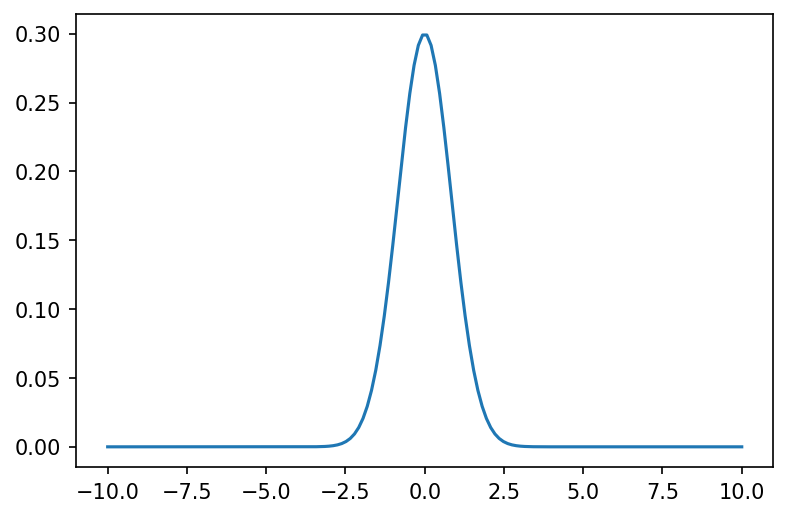

In [22]:
fig = plt.figure(dpi=150)

plt.plot(x,HO_solver(2,D20,V0)[1])

plt.show()

In [ ]:
#Rest of the smart code goes here...